<a href="https://colab.research.google.com/github/kdy4049067/gradient/blob/main/Assignment_Introduction_to_ML_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: Multi-Layer Perceptron and Gradient Descent

문제를 차분히 읽어보고 코드를 작성하고, 설명하세요. 답안은 영어/국문 모두 상관없습니다.

Following codes are training MLP for [dataset](https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/) using Keras.

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. Helper codes

In [48]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics

from tensorflow import keras
import requests

In [49]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [50]:
dataset_URL = "https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/"

In [51]:
url = dataset_URL + "x_test.csv"
c = pd.read_csv(url, on_bad_lines='skip')

In [52]:
# Load training data
train_input = pd.read_csv(dataset_URL + 'x_train.csv', skiprows=1, delimiter=',').to_numpy()
train_target = pd.read_csv(dataset_URL + 'y_train.csv', skiprows=1, delimiter=',').to_numpy()

# Load test data
test_input = pd.read_csv(dataset_URL + 'x_test.csv', skiprows=1, delimiter=',').to_numpy()
test_target = pd.read_csv(dataset_URL + 'y_test.csv', skiprows=1, delimiter=',').to_numpy()

assert train_input.shape[0] == train_target.shape[0]
assert test_input.shape[0] == test_target.shape[0]

train_target = train_target.flatten()
test_target = test_target.flatten()

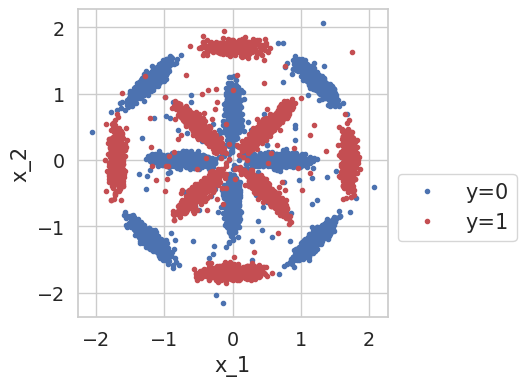

In [53]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel('x_1'); plt.ylabel('x_2');

In [54]:
from tensorflow import keras

In [55]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,137 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [58]:
history = model.fit(train_input, train_target,
          validation_data = (test_input, test_target),
          epochs=15, batch_size = 32, verbose = 0)

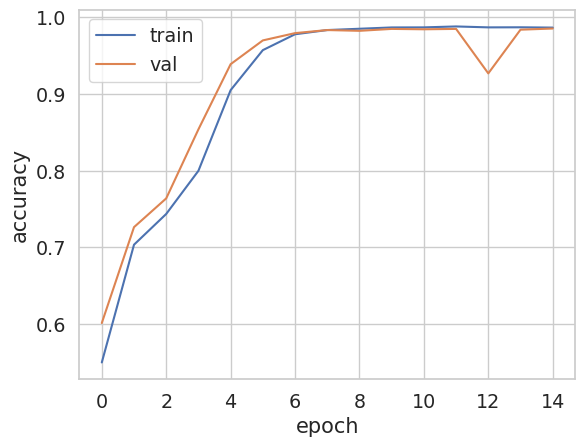

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## Visualize the output

In [60]:
def visualize_network(model, train_input, train_target):
  # -1에서 1 사이의 균일한 값 생성
  num_points = 100  # 원하는 점의 개수
  x = np.linspace(-2, 2, num_points)
  y = np.linspace(-2, 2, num_points)

  # 2D 그리드 생성
  xx, yy = np.meshgrid(x, y)

  # 2D 그리드를 하나의 numpy array로 변환
  data = np.vstack([xx.ravel(), yy.ravel()]).T

  res = model.predict(data)

  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=res[:, 0], cmap='coolwarm', alpha=0.7)
  plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
  plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
  plt.colorbar(label='Result Value')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Scatter plot with color representing result value')
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


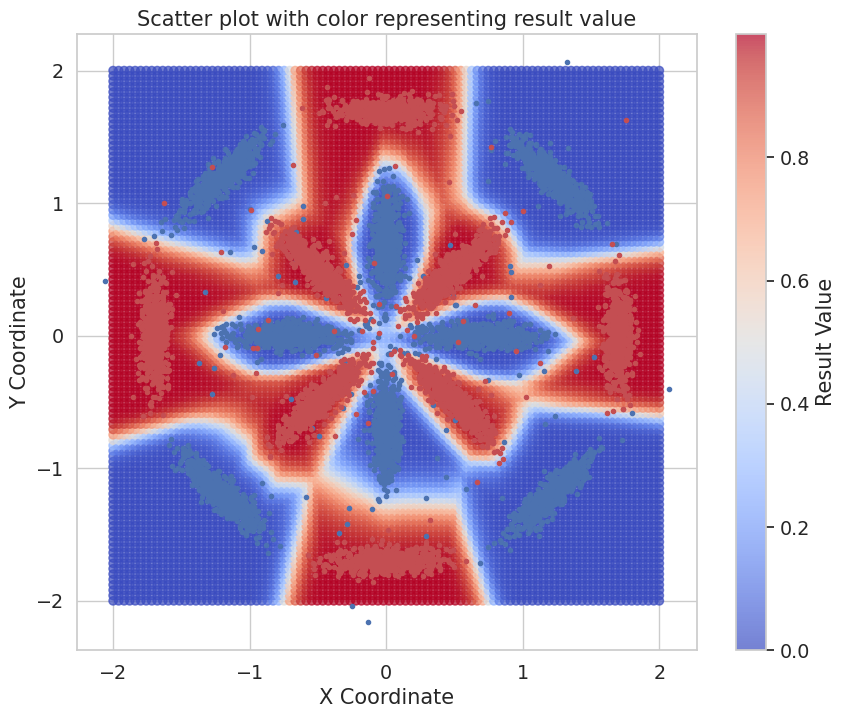

In [61]:
visualize_network(model, train_input, train_target)

## Task 1: Deep Neural Network

Make a network with only a single layer, train it, and visualize using `visualize_network`.

How does it look? Explain why.

How can we change the structure of the network?

### Important Notes:

* You can use any ML library you want for Task 1, but try to implement by yourself using **numpy native functions**; it will be helpful for your understanding and Tasks 2 and 3.

In [62]:
# define model
class SimpleNeuralNetwork:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim) * 0.01  # 가중치 초기화
        self.bias = 0.0  # 편향 초기화

    def sigmoid(self, x): #시그모이드 함수
        return 1 / (1 + np.exp(-x))

    def predict(self, X): #예측
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)



In [63]:
# train
def train(model, X, y, epochs=1000, lr=0.1):
    for epoch in range(epochs): #epochs 만큼 시도
        preds = model.predict(X) #예측 결과
        error = preds - y #오차 값

        # 평균 제곱 오차 기준 gradient 계산
        grad_w = np.dot(X.T, error) / len(X)
        grad_b = np.mean(error)

        # 파라미터 업데이트
        model.weights -= lr * grad_w
        model.bias -= lr * grad_b




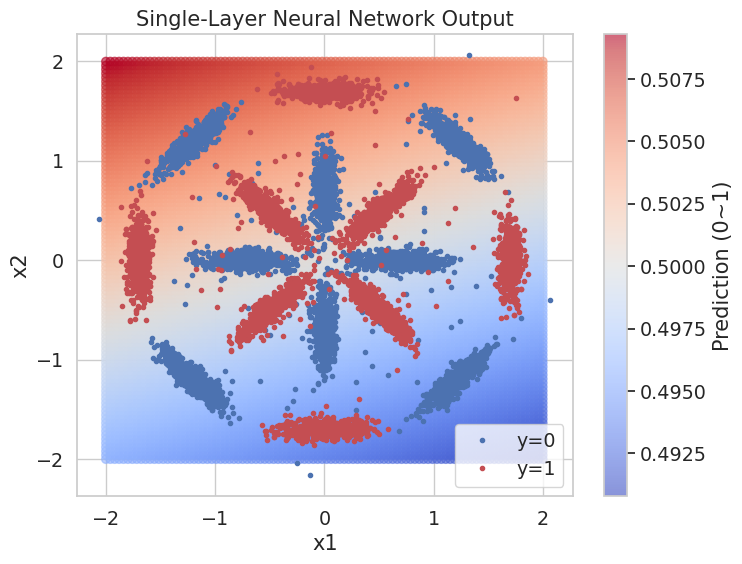

In [64]:
# visualize
def visualize_network(model, train_input, train_target):
    x = np.linspace(-2, 2, 100) # -1에서 1사이의 값 , 점의 개수 100
    y = np.linspace(-2, 2, 100) # -1에서 1 사이의 값, 점의 개수 100
    #2D 그리드 생성
    xx, yy = np.meshgrid(x, y)
    # 2D 그리드를 하나의 numpy array로 변환
    data = np.vstack([xx.ravel(), yy.ravel()]).T

    #예측 값
    res = model.predict(data)

    plt.figure(figsize=(8, 6)) #그림 크기 설정
    plt.scatter(data[:, 0], data[:, 1], c=res, cmap='coolwarm', alpha=0.6) #각 x축 , y축 좌표의 색상 res값에 따라 저
    plt.plot(train_input[train_target == 0, 0], train_input[train_target == 0, 1], 'b.', label='y=0') # 예측 값이 0인 데이터를 파란색으로 지정
    plt.plot(train_input[train_target == 1, 0], train_input[train_target == 1, 1], 'r.', label='y=1') # 예측 값이 1인 데이터를 빨간색으로 지정
    plt.colorbar(label='Prediction (0~1)') #colorbar
    plt.xlabel('x1') #x축 라벨
    plt.ylabel('x2') #y축 라벨
    plt.title('Single-Layer Neural Network Output') #제목
    plt.legend()
    plt.show()

model = SimpleNeuralNetwork(input_dim=2)   # define model
train(model, train_input, train_target, epochs=1000, lr=0.1)  # train
visualize_network(model, train_input, train_target)  # visualize


## Answer 1:

1. How does it look? Explain why:
데이터의 분포를 제대로 학습 못하고 있는 것 처럼 보인다. 출력값이 대부분 0.5 근처에 모여있는 것으로 보아 모델이 0과 1을 잘 구분하지 못하고 있는 것으로 보인다. 현재 입력층 -> 출력층만 있는 단일 계층 구조이므로 선형적인 경계만 만들 수 있기 때문에 제대로 학습할 수 없다.
(your answer here)

2. How can we change the structure of the network?
복잡한 데이터를 잘 학습하도록 하기 위해서는 다층 신경망으로 바꾸어야 하므로 은닉층을 추가해야 한다. 은닉층은 ReLu, sigmoid 등 비선형 activation function을 사용해야 한다.
(your answer here)


## Task 2: Forward Pass Method

Implement the forward pass of the exact same network.

| Layer (type)  | Output Shape | Param # |
|---------------|---------------|---------|
| dense (Dense) | (None, 16)    | 48      |
| dense_1 (Dense)| (None, 32)   | 544     |
| dense_2 (Dense)| (None, 16)   | 528     |
| dense_3 (Dense)| (None, 1)    | 17      |


## Task 3: Training the Neural Network

Implement the training of **the same** network as in the Keras example.

Basic settings are given as follows, but feel free to modify:

* Loss function: binary cross-entropy
* Optimizer: SGD with learning rate 0.05
* Epochs: 15
* Batch size: 32

### Important Notes:

* Implement the training of the network by finishing the skeleton code below.
* **Do not** use ML libraries such as Keras or PyTorch.
* Only **NumPy functions** are allowed.
* Make comments detailed. They will be considered as part of the report.
* Never cheat by using AI tools like Gemini or ChatGPT to do your homework.


In [65]:
## Skeleton code
import numpy as np

class flowerNet():
  #초기 모델 None 값으로 초기화
  def __init__(self):
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.w3 = None
    self.b3 = None
    self.w4 = None
    self.b4 = None

    # 모델의 learning_rate 지정
    self.learning_rate = 0.05

  def predict(self, x):

        # 시그모이드 함수
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        # relu activation 함수(음수일 땐 0, 아니면 z 출력)
        def relu(z):
            return np.maximum(0, z)

        # 가중치 초기화 (처음 호출 시)
        if self.w1 is None:
            # 랜덤 값을 항상 동일하게 생
            np.random.seed(42)
            # 입력 데이터의 차원(특성 )
            input_dim = x.shape[1]

            # 가중치와 bias 초기화 단계(문제에 주어진대로)
            # 첫 번째 은닉층의 가중치(입력 노드 수 = input_dim, 은닉 노드 수는 16)
            # np.radom.randn 은 평균 0, 표준편차 1인 정규분포에서 값을 가져옴 그 후 0.1 곱해서 작게 만듦
            # 노드 수만큼 bias 0으로 초기화
            self.w1 = np.random.randn(input_dim, 16) * 0.1
            self.b1 = np.zeros(16)
            self.w2 = np.random.randn(16, 32) * 0.1
            self.b2 = np.zeros(32)
            self.w3 = np.random.randn(32, 16) * 0.1
            self.b3 = np.zeros(16)
            self.w4 = np.random.randn(16, 1) * 0.1
            self.b4 = np.zeros(1)

        # forward 연산
        # z = np.dot(x, self.w1) + self.b1 과 동일한 연산
        z1 = x @ self.w1 + self.b1
        # 결과 값에 relu 적용해 비선형성 부여
        # 같은 작업 반복
        a1 = relu(z1)
        z2 = a1 @ self.w2 + self.b2
        a2 = relu(z2)
        z3 = a2 @ self.w3 + self.b3
        a3 = relu(z3)
        z4 = a3 @ self.w4 + self.b4
        # 마지막 결과 값에 sigmoid를 사용하는 이유는 이진 부류가 목적이기 때문이다.
        a4 = sigmoid(z4)

        # 0.5 기준으로 분류
        preds = (a4 > 0.5).astype(int).flatten()
        return preds

  def train(self, x, y_target):
        #시그모이드 함수
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        #relu 함수
        def relu(z):
            return np.maximum(0, z)
        #relu 미분 함수, 0아니면 1 반환
        def relu_deriv(z):
            return (z > 0).astype(float)
        #
        def binary_cross_entropy(y_predict, y_true):
            eps = 1e-7
            #y_pred 값이 0이나 1에 너무 가까워질 경우를 위해 사용
            y_predict = np.clip(y_predict, eps, 1 - eps)
            #loss = -(ylogy' + (1-y)log(1-y')) 구현
            return -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


        # 가중치 초기화
        if self.w1 is None:
            # predict에서 수행한 초기화와 똑같은 코드
            np.random.seed(42)
            dim = x.shape[1]
            self.w1 = np.random.randn(dim, 16) * 0.1
            self.b1 = np.zeros(16)
            self.w2 = np.random.randn(16, 32) * 0.1
            self.b2 = np.zeros(32)
            self.w3 = np.random.randn(32, 16) * 0.1
            self.b3 = np.zeros(16)
            self.w4 = np.random.randn(16, 1) * 0.1
            self.b4 = np.zeros(1)

        # 입력 데이터의 샘플 개수
        samples = x.shape[0]

        # epochs 만큼 반복
        for epoch in range(15):
            # 0 ~ n_samples-1을 무작위 순서로 가지는 배열
            perm = np.random.permutation(samples)
            # 입력 데이터 무작위 배열
            x_random = x[perm]
            # target 데이터 무작위 배열
            y_random = y_target[perm]

            # loss 담기 위한 배열
            losses = []

            # batch size를 16으로 설정 후 0부터 sample 사이즈까지 수행
            for i in range(0, samples, 16):
                #batch 사이즈만큼의 데이터 배열
                xi = x_random[i:i+16]
                yi = y_random[i:i+16]

                # Forward pass
                # 순전파 과정
                z1 = xi @ self.w1 + self.b1
                # 결과 값에 relu 활성화 함수 적용(비선형성 부여)
                a1 = relu(z1)
                z2 = a1 @ self.w2 + self.b2
                a2 = relu(z2)
                z3 = a2 @ self.w3 + self.b3
                a3 = relu(z3)
                z4 = a3 @ self.w4 + self.b4
                # 이진 분류 결과 값을 위한 sigmoid 적용
                a4 = sigmoid(z4)

                # 이전에 구현한 loss 함수에 결과 값과 결과 값 대입
                loss = binary_cross_entropy(a4, yi.reshape(-1, 1))
                # losses 배열에 구한 loss 추가
                losses.append(loss)

                # 역전파 과정 (chain rule 이용)
                # 배치의 샘플 개수
                m = yi.shape[0]
                # (예측 값 - 실제 값) / 샘플 개수
                dz4 = (a4 - yi.reshape(-1,1)) / m

                # w4에 대한 미분
                dW4 = a3.T @ dz4
                # 편향 미분 (각 샘플 기울기 모두 더한 값)
                db4 = np.sum(dz4, axis=0)

                # 다음 층의 기울기 현재 층으로 전달
                da3 = dz4 @ self.w4.T
                # z3를 통과한 relu_deriv 도함수 곱하기
                dz3 = da3 * relu_deriv(z3)
                # 같은 작업 층마다 반복 ----
                dW3 = a2.T @ dz3
                db3 = np.sum(dz3, axis=0)

                da2 = dz3 @ self.w3.T
                dz2 = da2 * relu_deriv(z2)

                dW2 = a1.T @ dz2
                db2 = np.sum(dz2, axis=0)

                da1 = dz2 @ self.w2.T
                dz1 = da1 * relu_deriv(z1)

                dW1 = xi.T @ dz1
                db1 = np.sum(dz1, axis=0)

                # Gradient descent update
                # 각 가중치와 bias에 대해서 미분 값 * learning_rate 곱해서 변경해줌
                # loss의 손실을 줄이기 위함
                self.w4 -= self.learning_rate * dW4
                self.b4 -= self.learning_rate * db4
                self.w3 -= self.learning_rate * dW3
                self.b3 -= self.learning_rate * db3
                self.w2 -= self.learning_rate * dW2
                self.b2 -= self.learning_rate * db2
                self.w1 -= self.learning_rate * dW1
                self.b1 -= self.learning_rate * db1
            # 각 epoch 마다 손실이 어떻게 변하는지 확인
            print(f"Epoch {epoch+1}/{15} - Loss: {np.mean(losses):.4f}")

In [66]:
# define model
# 모델 정의
myModel = flowerNet()

In [67]:
# accuracy before training
# train 하기 전 train_input에 대한 예측 값 출력
y = myModel.predict(train_input)

# train 하기 전 예측 값 출력
print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

# train 하기 전 test_input에 대한 예측 값 출력
y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.49764976497649765
Validation accuracy: 0.4957478739369685


In [68]:
# training example
# 모델 train 시작
myModel.train(train_input, train_target)


Epoch 1/15 - Loss: 0.6932
Epoch 2/15 - Loss: 0.6928
Epoch 3/15 - Loss: 0.6924
Epoch 4/15 - Loss: 0.6917
Epoch 5/15 - Loss: 0.6908
Epoch 6/15 - Loss: 0.6888
Epoch 7/15 - Loss: 0.6847
Epoch 8/15 - Loss: 0.6752
Epoch 9/15 - Loss: 0.6361
Epoch 10/15 - Loss: 0.5144
Epoch 11/15 - Loss: 0.3859
Epoch 12/15 - Loss: 0.2643
Epoch 13/15 - Loss: 0.1518
Epoch 14/15 - Loss: 0.0989
Epoch 15/15 - Loss: 0.0763


In [69]:
# accuracy after training
# 모델을 train 한 후에 train_input에 대한 예측 값
y = myModel.predict(train_input)

# 모델을 train 한 후에 train_input에 대한 예측 값과 target 사이의 정확도
print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

# 모델을 train 한 후에 test_input에 대한 예측 값과 target 사이의 정확도
y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.9862986298629863
Validation accuracy: 0.9824912456228114


## Answer 2 and 3. Explanation of codes.

이 코드는 다층 신경망 모델 flowerNet 클래스를 구현한 것으로, 문제에서 제시된 것과 같이 4개의 은닉층과 출력층으로 구성되어 있다. 모델의 주요 기능으로는 predict와 train 메서드이다.

주요 기능
가중치 초기화
predict 에서 훈련 전에 정확도를 예상하는 기능이 있으므로 가중치를 초기화 해준다.
train을 할 때에도 만약 초기화가 되어져있지 않다면 초기화를 해준다
입력 특성 수에 맞춰 각 층의 가중치와 편향을 작은 랜덤 값과 0으로 초기화한다.

순전파 (Forward pass)
입력 데이터를 각 층의 가중치와 편향으로 선형 변환 후 ReLU 활성화 함수를 적용하여 은닉층 출력을 계산한다. 마지막 출력층에서는 sigmoid 함수를 사용해 이진 분류 확률을 구한다
predict 메서드는 이 확률에 0.5 기준을 적용해 클래스 예측 결과를 반환한다

학습 (Training)
train 메서드는 주어진 입력과 레이블로 15회 반복(epoch) 학습을 진행했다.

매 epoch마다 데이터 샘플 개수만큼의 수를 무작위로 섞는다.

배치 크기를 16으로 설정해 나누어 처리한다.

각 배치에 대해 순전파를 수행해 예측값을 구하고, 이진 교차 엔트로피 손실을 계산한다

역전파를 통해 각 층 가중치와 편향에 대한 손실 함수 기울기를 체인 룰로 계산한다.

계산된 기울기에 학습률을 곱해 기존 가중치와 편향을 갱신하며 손실을 줄이는 방향으로 파라미터를 조정한다.

train 결과 각 epoch이 끝날 때마다 해당 epoch 동안의 평균 손실 값을 출력해 학습 상황을 모니터링할 수 있게 한다.

코드마다 주석을 이용해 코드에 대한 설명을 적어놓았다.


### Acknowledgement

Data set from
https://www.cs.tufts.edu/comp/135/2023f/hw3.html



